In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# total classes in dataset
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [3]:
len(data.quality.unique())

6

In [4]:
# count of each classes
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
#checking dublicated records
data.duplicated().sum()

240

In [7]:
df = data.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
# creating dependent and independent
X = df.drop("quality", axis=1)
y = df["quality"]

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [12]:
# model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
model.score(X_train,y_train)

1.0

In [15]:
- model score = 1, that means model is overfitted

SyntaxError: invalid syntax (539199730.py, line 1)

In [16]:
y_predict = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_predict)

0.5167037861915368

[Text(0.5219298245614035, 0.9166666666666666, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.27631578947368424, 0.75, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.14035087719298245, 0.5833333333333334, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.07017543859649122, 0.4166666666666667, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.03508771929824561, 0.25, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.017543859649122806, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05263157894736842, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10526315789473684, 0.25, 'X[7] <= 0.996\ngini = 0.547\nsamples = 92\nvalue = [1, 0, 24, 56, 11, 0]'),
 Text(0.08771929824561403, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12280701754385964, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.210526315789

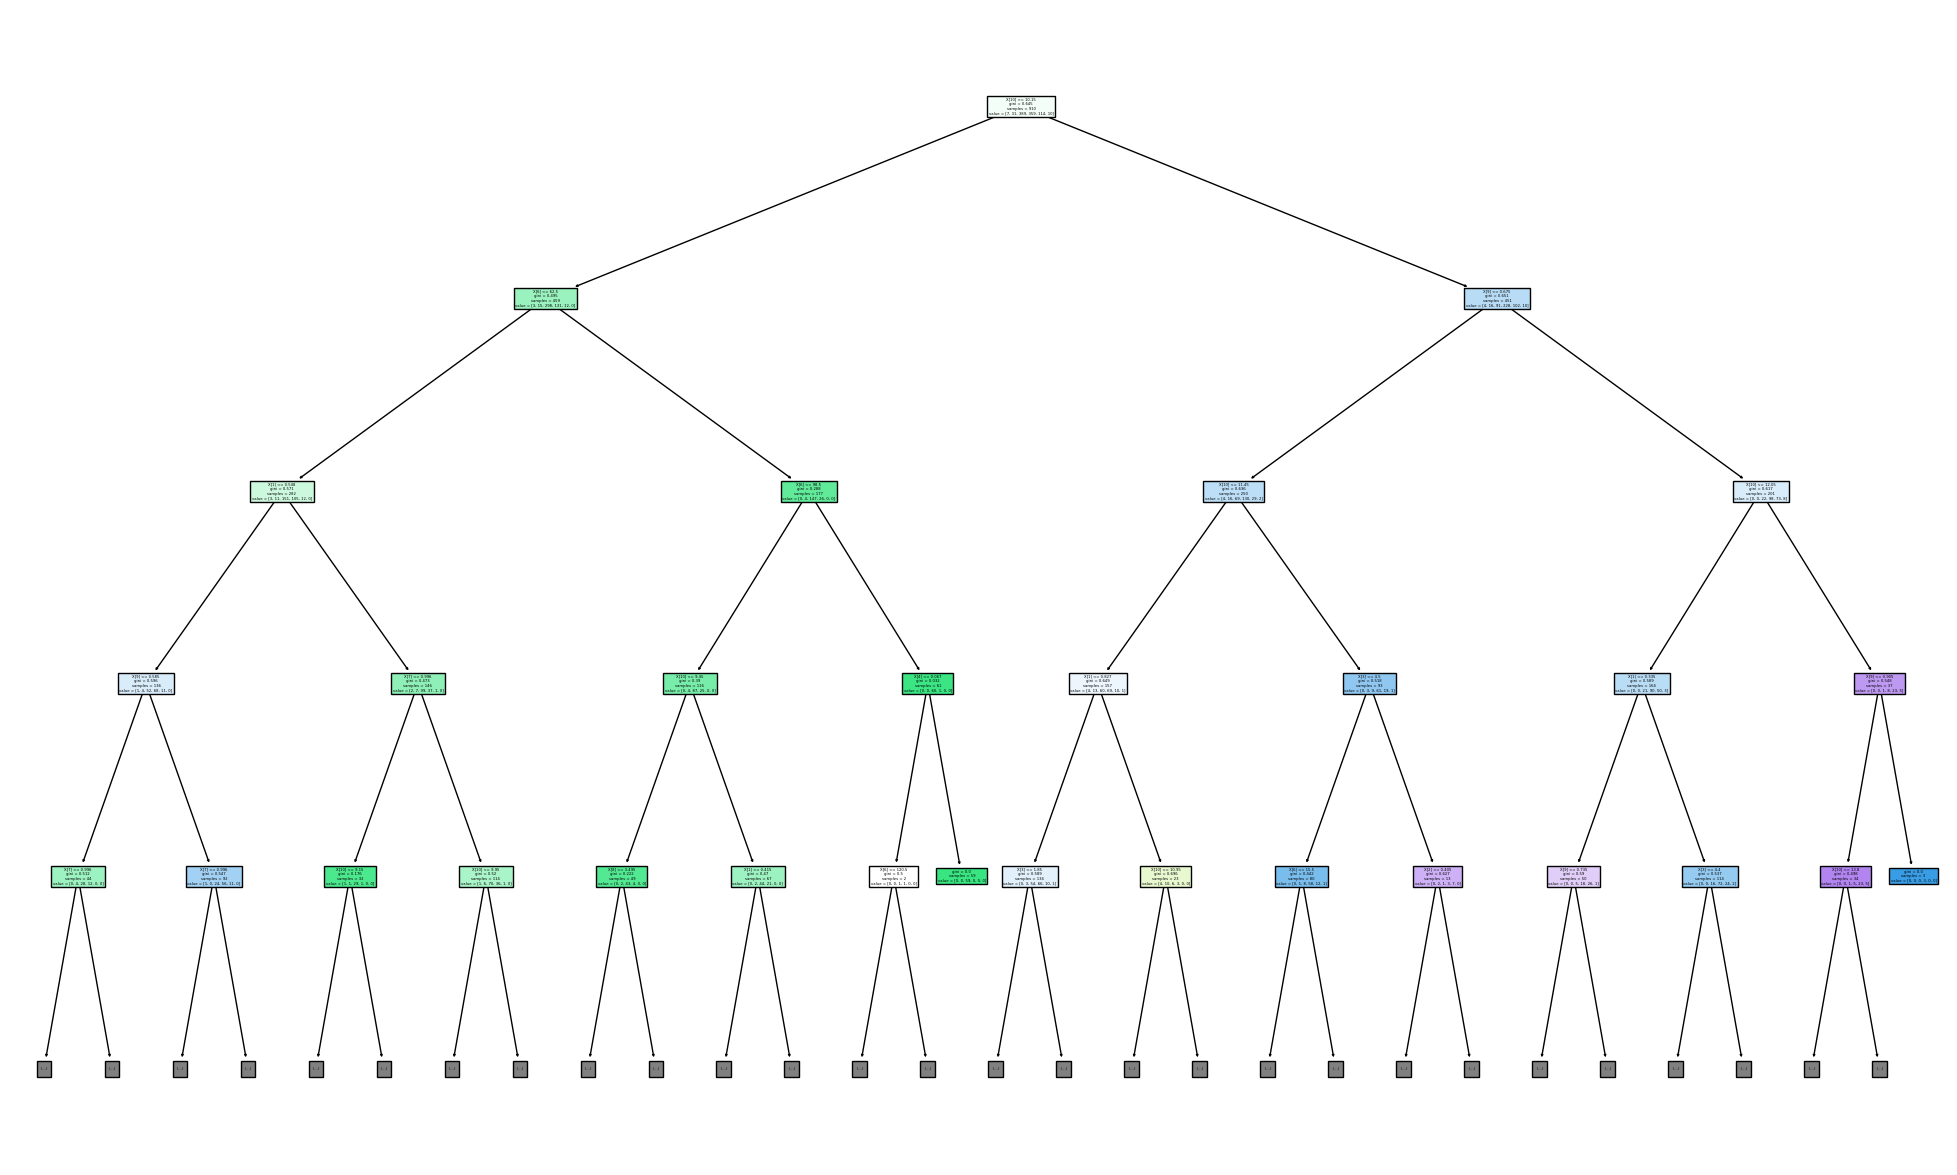

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth = 4, filled = True)

In [20]:
# to save
fig.savefig("decision_trr_classifier.png")

# GRID SEARCH CV

In [21]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [22]:
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best', 'random']
}

In [23]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [24]:
grid_searh.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [25]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'splitter': 'random'}

In [26]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 19,min_samples_leaf= 7,min_samples_split= 6,splitter='random')

In [27]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=7, min_samples_split=6,
                       splitter='random')

In [28]:
y_prediction2=model_with_best_params.predict(X_test)

In [29]:
accuracy_score(y_test,y_prediction2)

0.5278396436525612

[Text(0.36160714285714285, 0.9166666666666666, 'X[9] <= 0.477\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.07142857142857142, 0.75, 'X[1] <= 0.446\ngini = 0.469\nsamples = 43\nvalue = [1, 4, 30, 8, 0, 0]'),
 Text(0.03571428571428571, 0.5833333333333334, 'gini = 0.49\nsamples = 7\nvalue = [0, 0, 4, 3, 0, 0]'),
 Text(0.10714285714285714, 0.5833333333333334, 'X[9] <= 0.435\ngini = 0.446\nsamples = 36\nvalue = [1, 4, 26, 5, 0, 0]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.628\nsamples = 11\nvalue = [1, 2, 6, 2, 0, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'X[1] <= 0.643\ngini = 0.339\nsamples = 25\nvalue = [0, 2, 20, 3, 0, 0]'),
 Text(0.10714285714285714, 0.25, 'gini = 0.165\nsamples = 11\nvalue = [0, 0, 10, 1, 0, 0]'),
 Text(0.17857142857142858, 0.25, 'X[0] <= 7.719\ngini = 0.449\nsamples = 14\nvalue = [0, 2, 10, 2, 0, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.083333333333

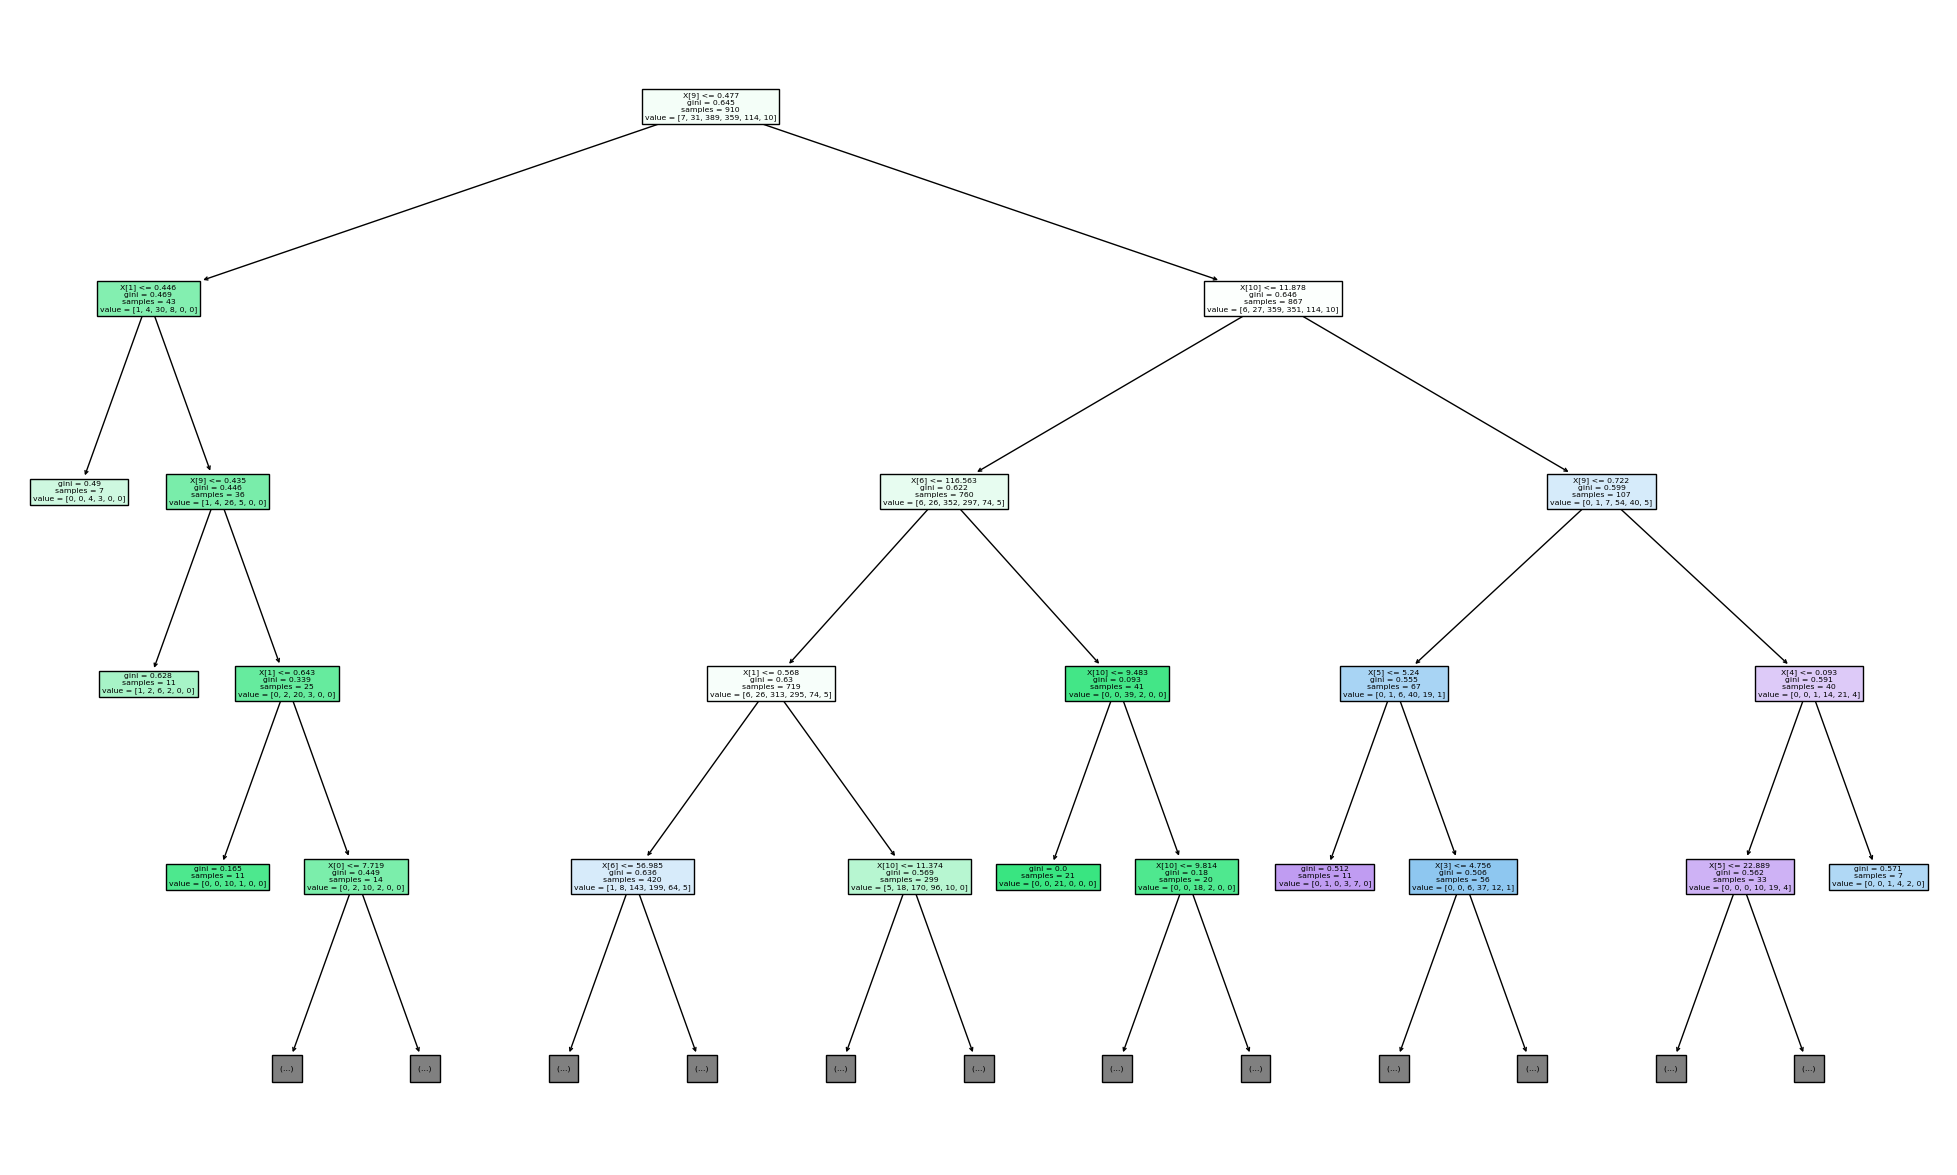

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params, max_depth = 4, filled = True)

# Logistic Regression

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [57]:
scaler = StandardScaler()
X_strain_tf = scaler.fit_transform(X_train)
X_scaled

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [59]:
X_test_tf = scaler.transform(X_test)

In [60]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tf,y_train)

LogisticRegression()

In [61]:
y_pred = log_reg.predict(X_test_tf)

In [62]:
model.score(X_train_tf,y_train)

0.6714285714285714

In [63]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5567928730512249

# SVC

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=10)

In [44]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
903,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8
734,7.7,0.56,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.3
568,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7
1533,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
764,9.1,0.68,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.5
...,...,...,...,...,...,...,...,...,...,...,...
1354,7.2,0.58,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0
1583,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8
607,8.8,0.48,0.41,3.3,0.092,26.0,52.0,0.99820,3.31,0.53,10.5
1356,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.99464,3.36,0.44,10.1


In [45]:
X_train_tf = scaler.fit_transform(X_train)
X_train_tf

array([[-0.8981975 ,  0.33787327, -1.09172021, ...,  0.64018337,
        -0.41000771,  0.34573172],
       [-0.37927555,  0.17614906, -0.38072361, ...,  1.08591165,
        -0.22067735, -1.03820904],
       [ 0.83154232, -0.14729936,  1.09205506, ...,  0.00342868,
         0.85219464,  0.253469  ],
       ...,
       [ 0.25496238, -0.2551155 ,  0.68577129, ...,  0.00342868,
        -0.78866841,  0.06894357],
       [-1.30180346, -1.00982848, -0.12679625, ...,  0.32180602,
        -1.35665946, -0.3001073 ],
       [-1.01351349,  0.93086204, -0.99014927, ...,  0.83120977,
        -0.47311782, -0.20784458]])

In [46]:
X_test_tf = scaler.transform(X_test)

In [47]:
from sklearn.svm import SVC
model = SVC()

In [50]:
model.fit(X_train_tf,y_train)

SVC()

In [51]:
model.score(X_train_tf,y_train)

0.6714285714285714

In [52]:
y_predict = model.predict(X_test_tf)

In [55]:
accuracy_score(y_test,y_predict)

0.6102449888641426